Group No - 37(gwalke, sjain35, shrigane)

In [1]:
# Import necessary libraries
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the numpy library for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for creating data visualizations
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data preprocessing
import seaborn as sns  # Import seaborn for enhanced data visualization capabilities

In [2]:
# Load the data
df = pd.read_csv("heart_disease.csv")

In [3]:
# Generate unique patient IDs
patient_ids = range(1, len(df) + 1)

# Add the patient ID column to the DataFrame
df['Patient_ID'] = patient_ids

# Print the updated DataFrame with the new 'Patient_ID' column
print(df)

      Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4235  Female   48  primaryschool              1        20.0     NaN   
4236  Female   44     uneducated              1        15.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  

In [4]:
# Check for missing values
print(df.isna().sum())

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
Patient_ID           0
dtype: int64


In [5]:
# Remove the 'Patient_ID' column from the DataFrame 'df'
df = df.drop(['Patient_ID'], axis=1)

# Print the modified DataFrame 'df' after removing the 'Patient_ID' column
print(df)

      Gender  age      education  currentSmoker  cigsPerDay  BPMeds  \
0       Male   39   postgraduate              0         0.0     0.0   
1     Female   46  primaryschool              0         0.0     0.0   
2       Male   48     uneducated              1        20.0     0.0   
3     Female   61       graduate              1        30.0     0.0   
4     Female   46       graduate              1        23.0     0.0   
...      ...  ...            ...            ...         ...     ...   
4233    Male   50     uneducated              1         1.0     0.0   
4234    Male   51       graduate              1        43.0     0.0   
4235  Female   48  primaryschool              1        20.0     NaN   
4236  Female   44     uneducated              1        15.0     0.0   
4237  Female   52  primaryschool              0         0.0     0.0   

     prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 no             0         0    195.0  106.0   70.0  

In [6]:
# Print the number of records (rows) in the dataset
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')

# Print the number of features (columns) in the dataset
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')

# Print the total number of values in the dataset
print(f'\033[94mNumber of values in the dataset are: {df.count().sum()}')

# Print the number of missing values in the dataset
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 4238
Number of features (columns) in the dataset are: 16
Number of values in the dataset are: 67163
Number missing values in the dataset are: 645


In [7]:
## Now we proceed with our original plan to remove null values

## Null values in numerical variables
df.glucose.fillna(df.glucose.median(), inplace=True)  # Fill null values in 'glucose' with the median
df.cigsPerDay.fillna(df.cigsPerDay.median(), inplace=True)  # Fill null values in 'cigsPerDay' with the median
df.totChol.fillna(df.totChol.median(), inplace=True)  # Fill null values in 'totChol' with the median
df.BMI.fillna(df.BMI.median(), inplace=True)  # Fill null values in 'BMI' with the median
df.heartRate.fillna(df.heartRate.median(), inplace=True)  # Fill null values in 'heartRate' with the median

## Null values in categorical variables
df.education = df.education.fillna(df.education.mode().iloc[0])  # Fill null values in 'education' with the mode
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])  # Fill null values in 'BPMeds' with the mode

## Check whether null values have been removed or not, after treating them
null_values = pd.isna(df).sum()  # Count the remaining null values in the dataframe
null_values = null_values[null_values > 0]  # Select columns with remaining null values
print(null_values)  # Print the columns with remaining null values

Series([], dtype: int64)


In [8]:
# Check for missing values
print(df.isna().sum())

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64


In [9]:
# Display information about the DataFrame 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [10]:
## Let's check the labels in categorical features
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        print()  # Print a blank line for separation
        print(col)  # Print the column name
        print(df[col].unique())  # Print the unique values in the categorical column


Gender
['Male' 'Female']

education
['postgraduate' 'primaryschool' 'uneducated' 'graduate']

prevalentStroke
['no' 'yes']

Heart_ stroke
['No' 'yes']


In [11]:
# Convert 'Gender' and 'Heart_Stroke' columns to lowercase for consistency
df['Gender'] = df['Gender'].str.lower()
df['Heart_Stroke'] = df['Heart_ stroke'].str.lower()

## Let's check the labels in categorical features

# Iterate through each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains categorical data
        print()  # Print a blank line for separation
        print(col)  # Print the column name
        print(df[col].unique())  # Print the unique values in the categorical column


Gender
['male' 'female']

education
['postgraduate' 'primaryschool' 'uneducated' 'graduate']

prevalentStroke
['no' 'yes']

Heart_ stroke
['No' 'yes']

Heart_Stroke
['no' 'yes']


In [12]:
# Generate a summary statistics table for all columns, including categorical data
# The '.T' transposes the table for better readability
summary_statistics = df.describe(include='all').T
print(summary_statistics)

                  count unique         top  freq        mean        std  \
Gender             4238      2      female  2419         NaN        NaN   
age              4238.0    NaN         NaN   NaN   49.584946    8.57216   
education          4238      4  uneducated  1825         NaN        NaN   
currentSmoker    4238.0    NaN         NaN   NaN    0.494101   0.500024   
cigsPerDay       4238.0    NaN         NaN   NaN    8.941482  11.902399   
BPMeds           4238.0    NaN         NaN   NaN    0.029259   0.168552   
prevalentStroke    4238      2          no  4213         NaN        NaN   
prevalentHyp     4238.0    NaN         NaN   NaN    0.310524   0.462763   
diabetes         4238.0    NaN         NaN   NaN     0.02572   0.158316   
totChol          4238.0    NaN         NaN   NaN  236.689476  44.327427   
sysBP            4238.0    NaN         NaN   NaN  132.352407  22.038097   
diaBP            4238.0    NaN         NaN   NaN   82.893464   11.91085   
BMI              4238.0  

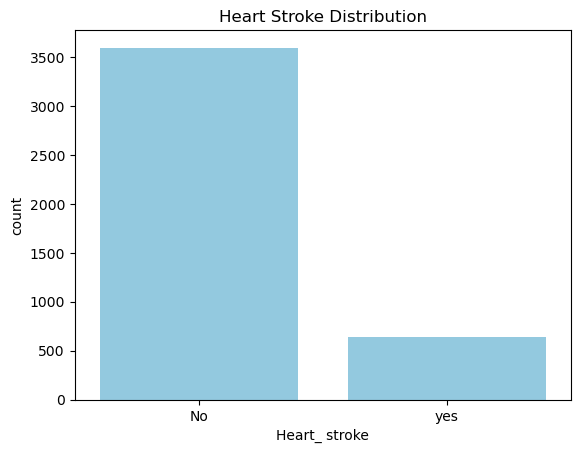

In [13]:
# Set the color for the plot
plot_color = 'skyblue'

# Create a countplot for the 'Heart Stroke' column in the DataFrame
sns.countplot(x='Heart_ stroke', data=df, color=plot_color)

# Set the title of the plot
plt.title("Heart Stroke Distribution")

# Display the plot
plt.show()

In [14]:
# Remove any duplicate rows from the DataFrame
df = df.drop_duplicates()

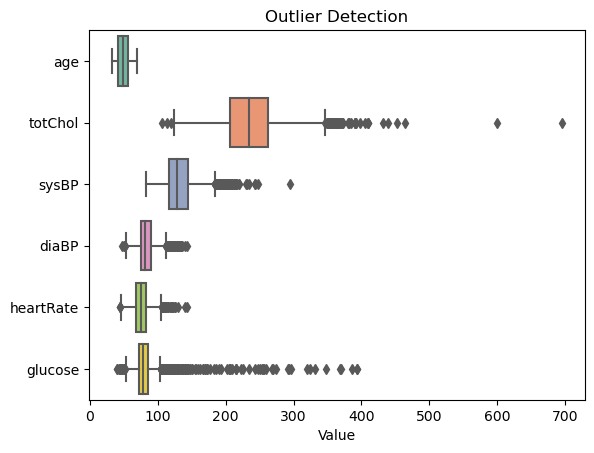

In [15]:
# Define the list of columns to check for outliers
columns_to_check = ["age", "totChol", "sysBP", "diaBP", "heartRate", "glucose"]

# Create a boxplot using Seaborn to visualize potential outliers
sns.boxplot(data=df[columns_to_check], orient="h", palette="Set2")

# Set the title of the plot
plt.title("Outlier Detection")

# Label the x-axis
plt.xlabel("Value")

# Display the plot
plt.show()

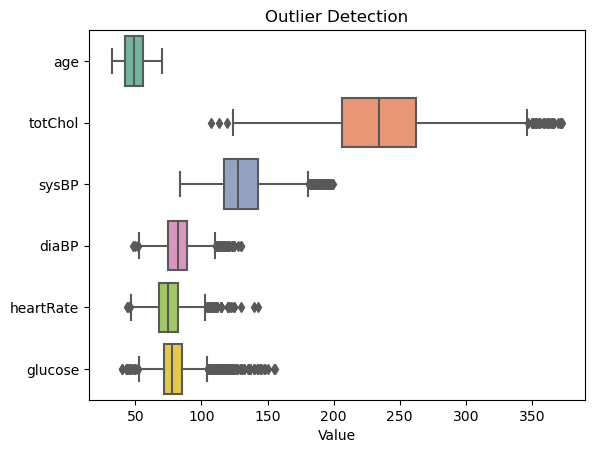

In [16]:
# Remove outliers from the DataFrame
df = df[~((df["totChol"] >= 380) | (df["sysBP"] >= 200) | (df["diaBP"] >= 170) | (df["heartRate"] >= 150) | (df["glucose"] >= 160))]

# Check for outliers
columns_to_check = ["age", "totChol", "sysBP", "diaBP", "heartRate", "glucose"]

# Create a boxplot using Seaborn to visualize potential outliers
sns.boxplot(data=df[columns_to_check], orient="h", palette="Set2")

# Set the title of the plot
plt.title("Outlier Detection")

# Label the x-axis
plt.xlabel("Value")

# Display the plot
plt.show()

In [17]:
# Print the column names of the DataFrame
print(df.columns)

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_ stroke',
       'Heart_Stroke'],
      dtype='object')


In [18]:
# List of categorical columns
cat_col = ["Gender", "education", "prevalentHyp", "currentSmoker", "diabetes"]

# List of numeric columns
num_col = ['age', 'cigsPerday', 'prevalentStroke', 'totChol', 'sysBp', 'diaBP', 'BMI', 'heartRate', 'glucose', 'BPMeds']

In [19]:
# Import the necessary library for ANOVA analysis
from scipy.stats import f_oneway

# Select the numerical features from the DataFrame
numerical_features = df.select_dtypes(include=np.number)

# Initialize empty lists to store ANOVA F-statistics and p-values
f_stats = []
p_vals = []

# Perform ANOVA analysis for each numerical feature
for feature in numerical_features.columns:
    # Group data by 'Heart_ stroke' (the target variable) and select the feature values for each group
    groups = [group[feature].values for name, group in df.groupby("Heart_ stroke")]
    
    # Calculate the ANOVA F-statistic and p-value for the current feature
    f_stat, p_val = f_oneway(*groups)
    
    # Append the F-statistic and p-value to their respective lists
    f_stats.append(f_stat)
    p_vals.append(p_val)

# Print the ANOVA results for each numerical feature
for i, feature in enumerate(numerical_features.columns):
    print(f"{feature}: F-statistic: {f_stats[i]:.3f}, P-value: {p_vals[i]:.3f}")

age: F-statistic: 204.225, P-value: 0.000
currentSmoker: F-statistic: 3.056, P-value: 0.080
cigsPerDay: F-statistic: 16.594, P-value: 0.000
BPMeds: F-statistic: 16.514, P-value: 0.000
prevalentHyp: F-statistic: 113.136, P-value: 0.000
diabetes: F-statistic: 5.175, P-value: 0.023
totChol: F-statistic: 18.586, P-value: 0.000
sysBP: F-statistic: 158.957, P-value: 0.000
diaBP: F-statistic: 67.376, P-value: 0.000
BMI: F-statistic: 18.425, P-value: 0.000
heartRate: F-statistic: 0.678, P-value: 0.410
glucose: F-statistic: 7.811, P-value: 0.005


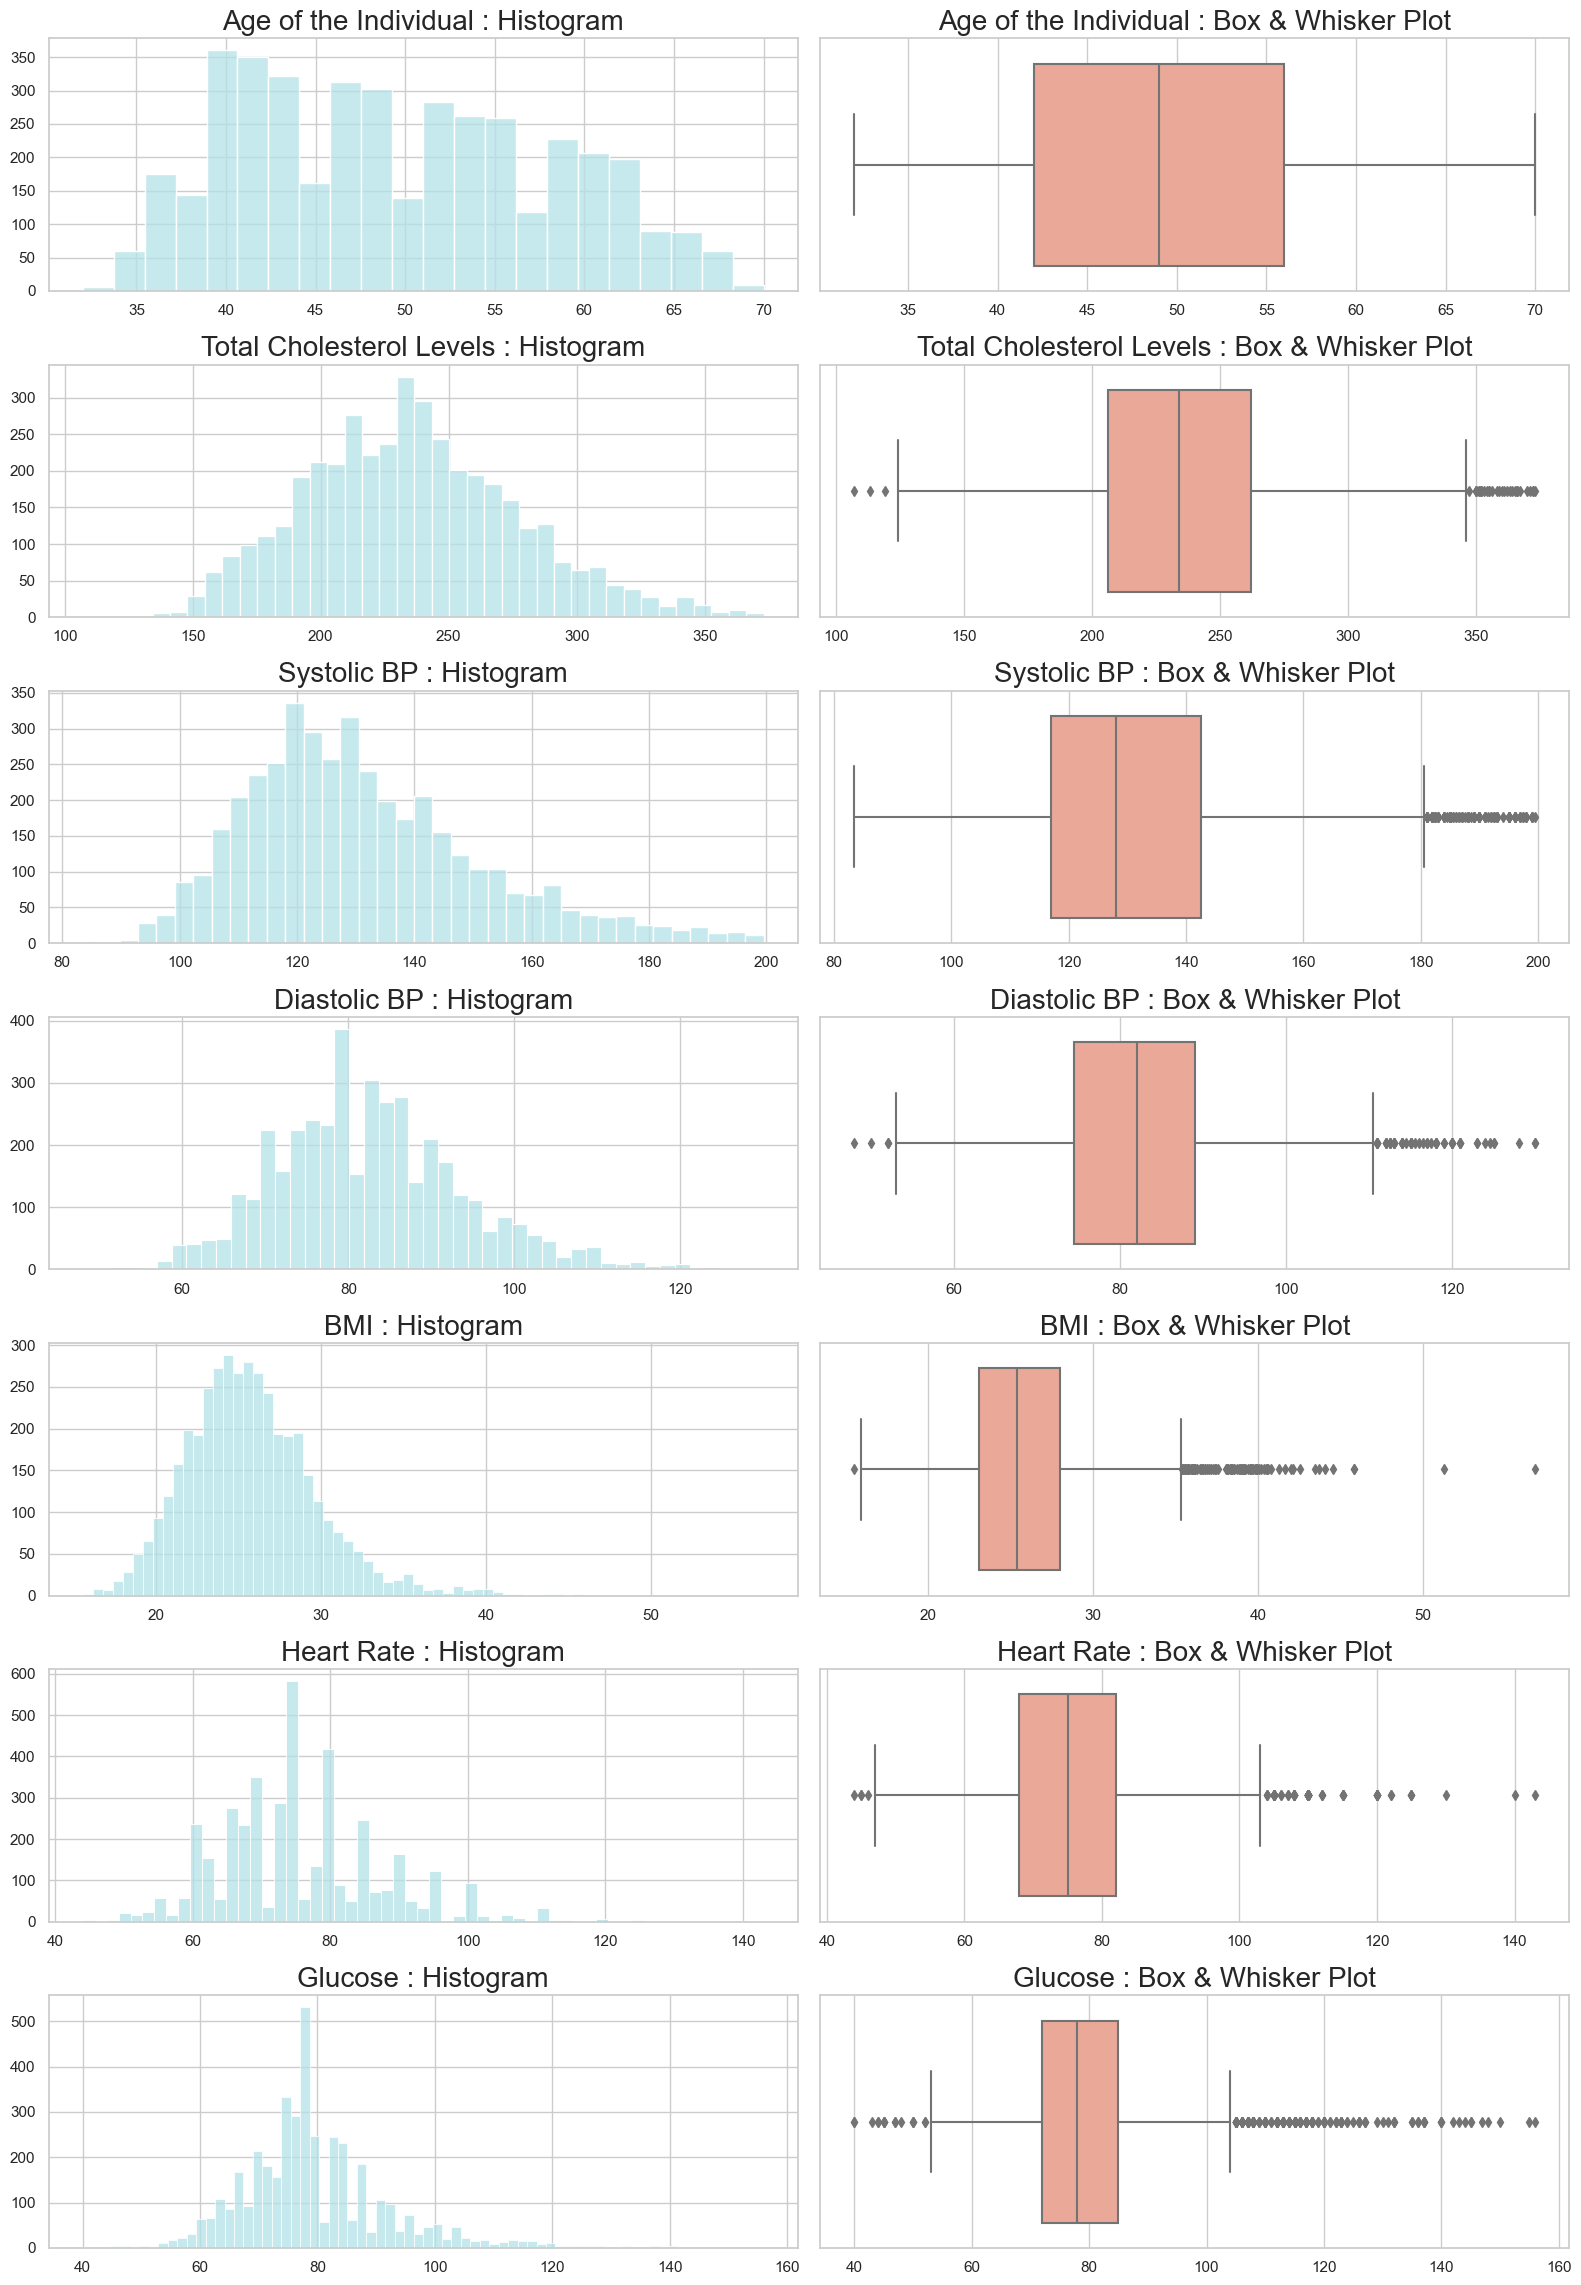

In [20]:
# Set the style and figure size for the plots
sns.set(style='whitegrid')
plt.figure(figsize=(16, 26))

# Define light colors for the plots
hist_color = '#B4E2E7'
box_color = '#F7A08A'

# Define a list of numerical features with their corresponding data columns
numerical_features = [
    ('Age of the Individual', df.age),
    ('Total Cholesterol Levels', df.totChol),
    ('Systolic BP', df.sysBP),
    ('Diastolic BP', df.diaBP),
    ('BMI', df.BMI),
    ('Heart Rate', df.heartRate),
    ('Glucose', df.glucose)
]

# Create subplots for each numerical feature
for i, (title, data) in enumerate(numerical_features):
    # Histogram subplot
    plt.subplot(8, 2, i * 2 + 1)
    plt.title(f'{title} : Histogram', fontsize=20)
    sns.histplot(data, color=hist_color, kde_kws={'linewidth': 2, 'color': 'r'})
    plt.ylabel(None)
    plt.xlabel(None)
    
    # Box & Whisker Plot subplot
    plt.subplot(8, 2, i * 2 + 2)
    plt.title(f'{title} : Box & Whisker Plot', fontsize=20)
    sns.boxplot(data, orient='h', color=box_color)
    plt.yticks([])

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()

C:\Users\Shriganesh Lokapure\AppData\Local\Temp\ipykernel_21848\2355710226.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,3,1)


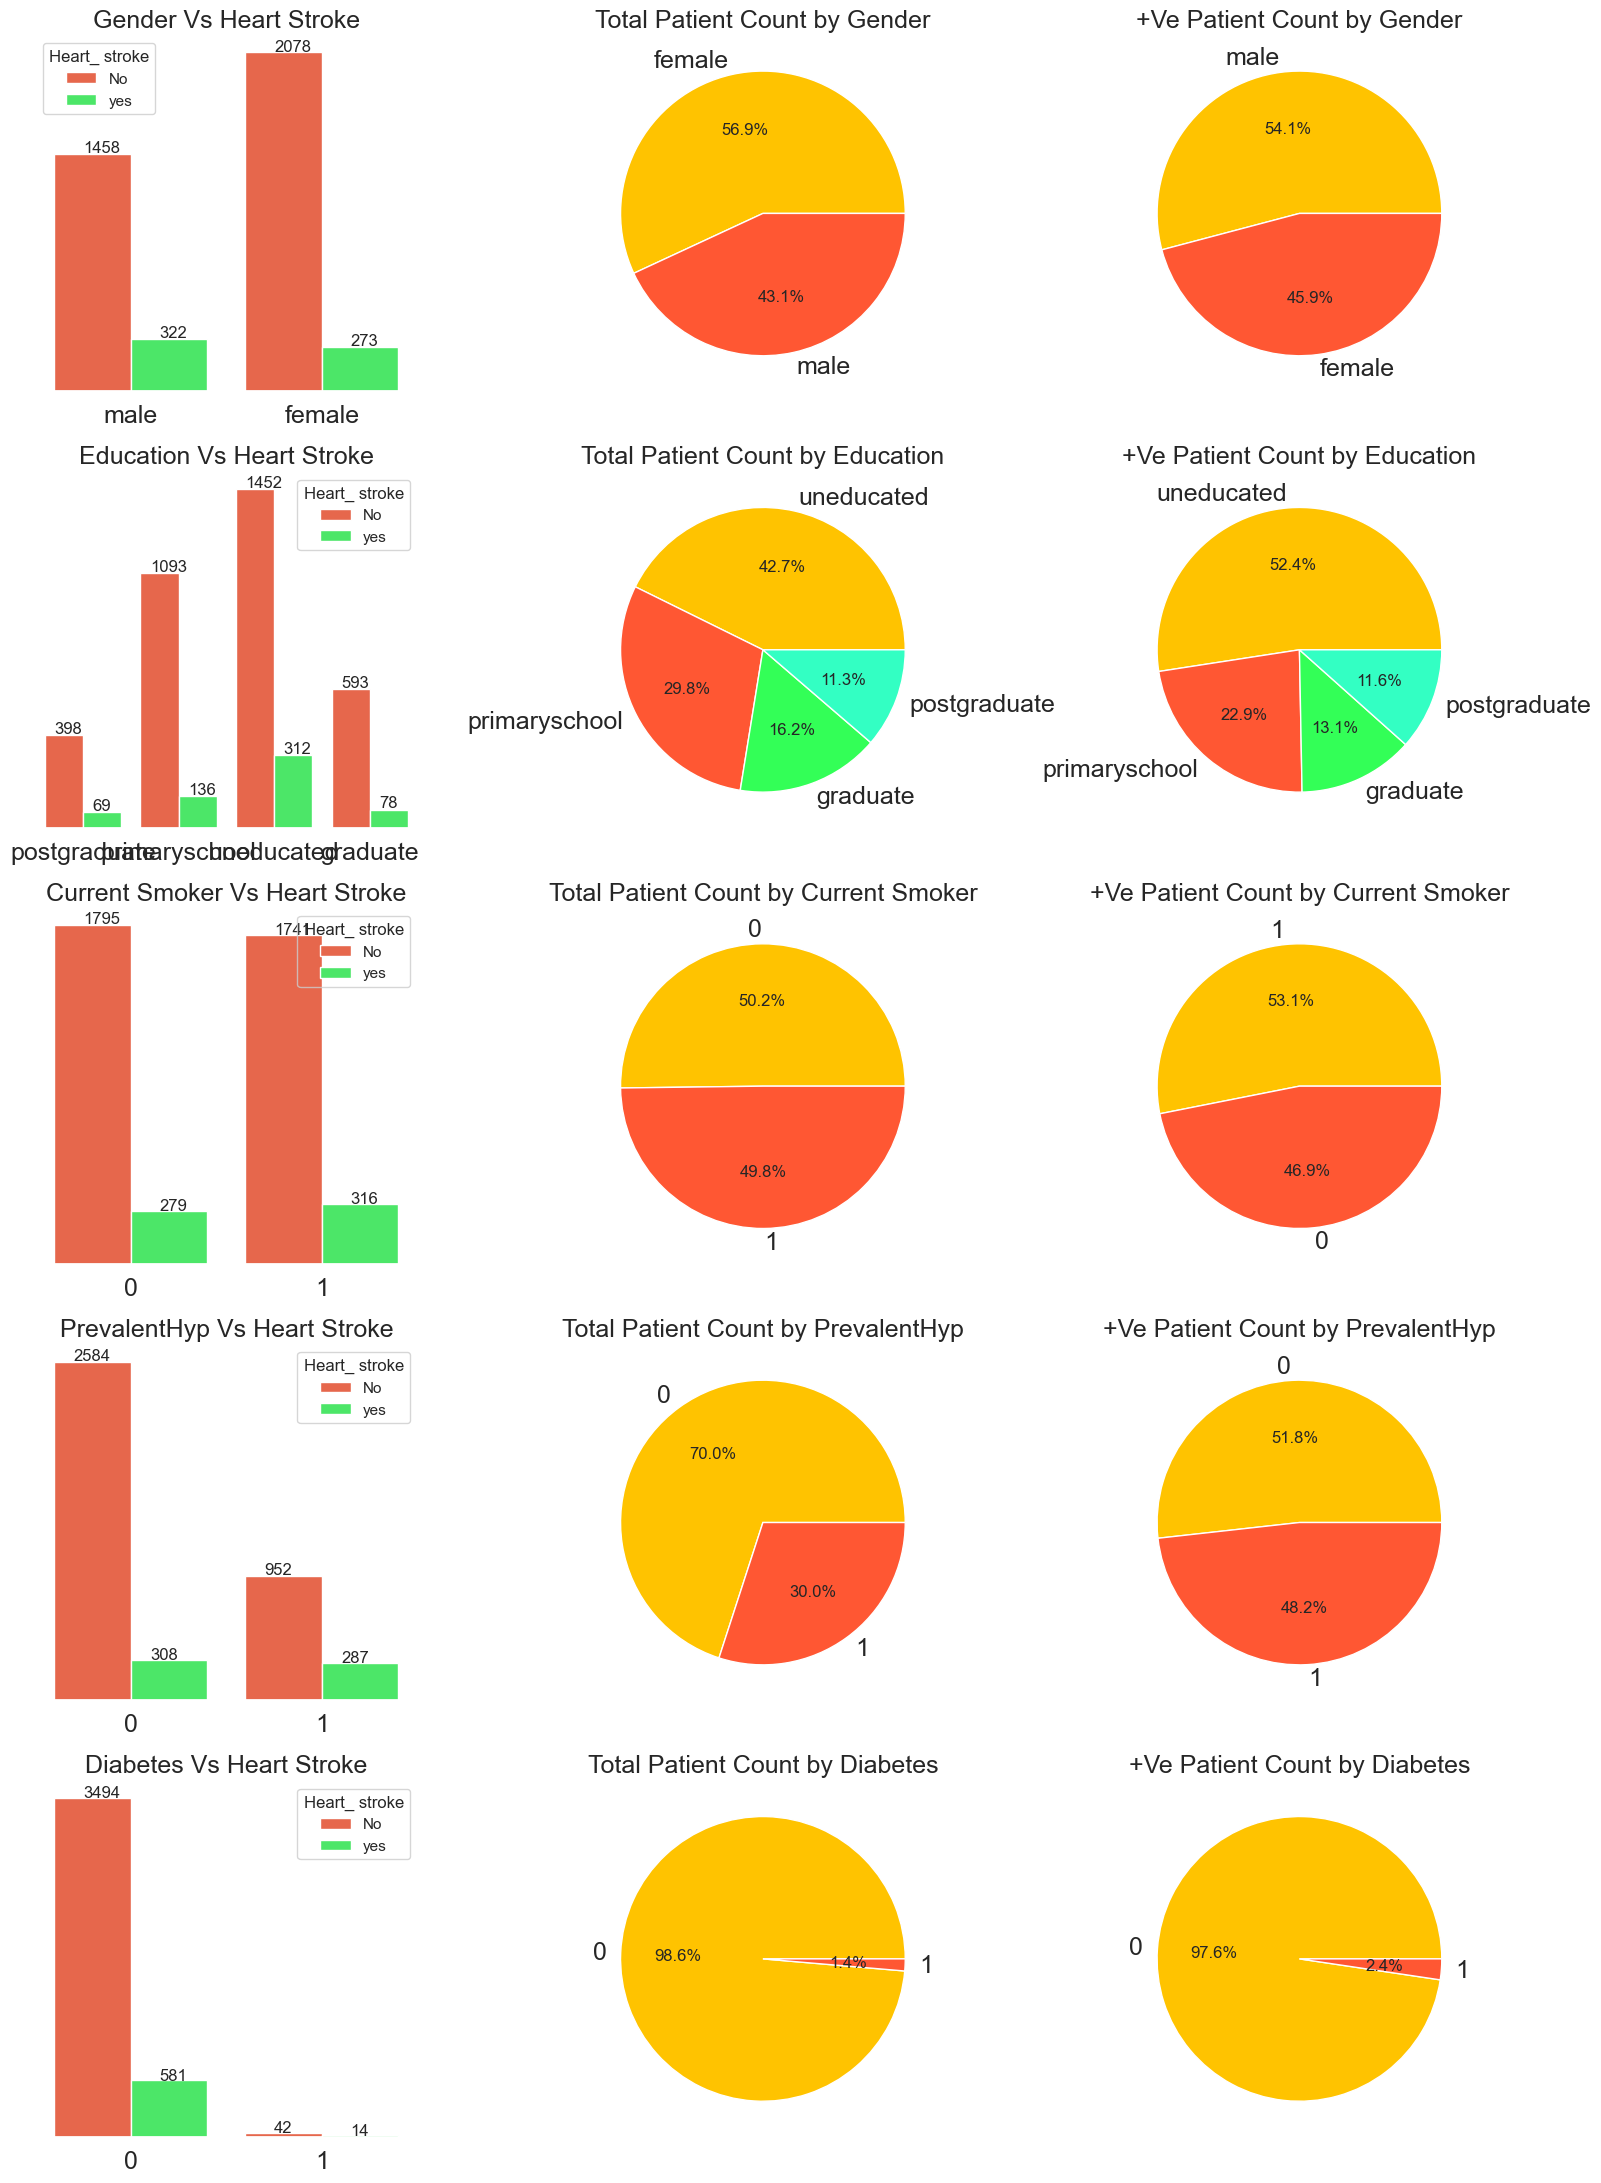

In [21]:
## Now let's do some analysis on categorical variables and their impact on Heart Stroke

# Set the style and figure size for the plots
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':18,'ytick.labelsize':18, 'figure.autolayout':True})

# Define colors for plotting
my_col = ('#FF5733', '#33FF57')  
my_pal = ('#FFC300', '#FF5733', '#33FF57', '#33FFC3', '#C333FF', '#FF33C3') 

# Create a figure for the plots
plt.subplots(figsize=(16,26))

## Gender
# Plot Gender Vs Heart Stroke
plt.subplot(6,3,1)
plt.title('Gender Vs Heart Stroke',fontsize=18)
ax = sns.countplot(x='Gender', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Plot Total Patient Count by Gender
plt.subplot(6,3,2)
plt.title('Total Patient Count by Gender', fontsize=18)
df['Gender'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Plot +Ve Patient Count by Gender
plt.subplot(6,3,3)
plt.title('+Ve Patient Count by Gender', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['Gender'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Education
# Plot Education Vs Heart Stroke
plt.subplot(6,3,4)
plt.title('Education Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='education', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Plot Total Patient Count by Education
plt.subplot(6,3,5)
plt.title('Total Patient Count by Education', fontsize=18)
df['education'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Plot +Ve Patient Count by Education
plt.subplot(6,3,6)
plt.title('+Ve Patient Count by Education', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['education'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Current Smoker
# Plot Current Smoker Vs Heart Stroke
plt.subplot(6,3,7)
plt.title('Current Smoker Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='currentSmoker', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Plot Total Patient Count by Current Smoker
plt.subplot(6,3,8)
plt.title('Total Patient Count by Current Smoker', fontsize=18)
df['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Plot +Ve Patient Count by Current Smoker
plt.subplot(6,3,9)
plt.title('+Ve Patient Count by Current Smoker', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Hypertension
# Plot PrevalentHyp Vs Heart Stroke
plt.subplot(6,3,10)
plt.title('PrevalentHyp Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='prevalentHyp', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Plot Total Patient Count by PrevalentHyp
plt.subplot(6,3,11)
plt.title('Total Patient Count by PrevalentHyp', fontsize=18)
df['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Plot +Ve Patient Count by PrevalentHyp
plt.subplot(6,3,12)
plt.title('+Ve Patient Count by PrevalentHyp', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Diabetes
# Plot Diabetes Vs Heart Stroke
plt.subplot(6,3,13)
plt.title('Diabetes Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='diabetes', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

# Plot Total Patient Count by Diabetes
plt.subplot(6,3,14)
plt.title('Total Patient Count by Diabetes', fontsize=18)
df['diabetes'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Plot +Ve Patient Count by Diabetes
plt.subplot(6,3,15)
plt.title('+Ve Patient Count by Diabetes', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['diabetes'].value_counts().plot(kind='pie', subplots=True, colors=my_pal, legend=None, ylabel='', autopct='%1.1f%%')

# Display the plot
plt.show()

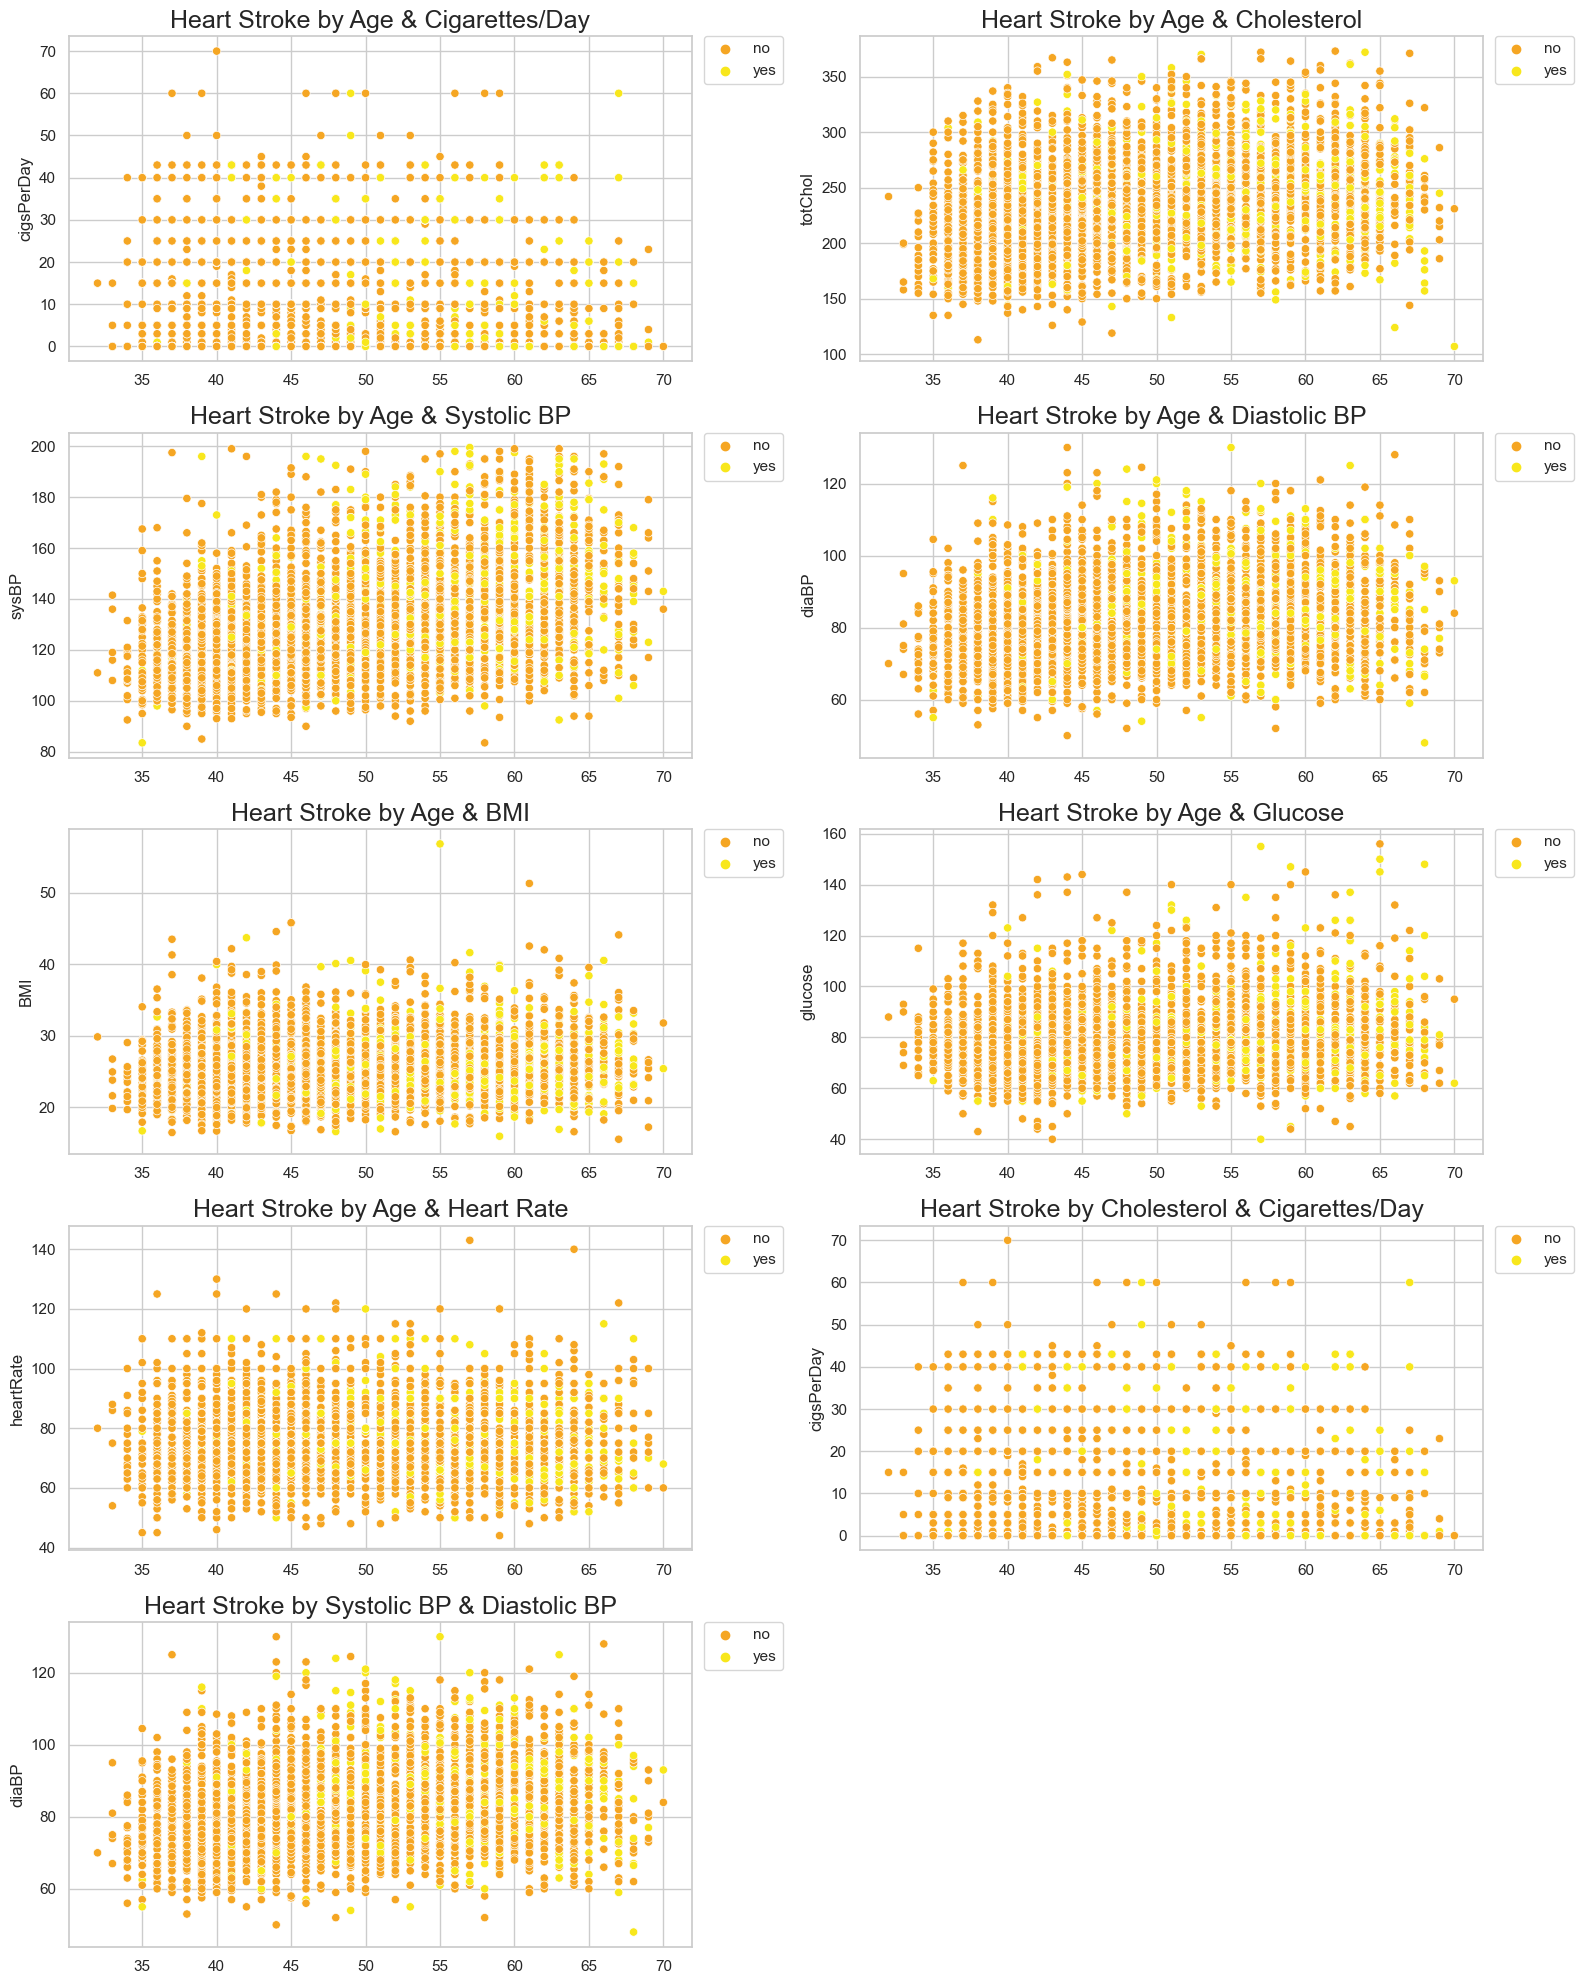

In [22]:
# Set the Seaborn style to a light theme (whitegrid)
sns.set(style="whitegrid")

# Create a custom color palette (you can customize these colors)
my_pal = ["#F5A623", "#F8E71C"]

# Create a figure with subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Titles for each subplot
titles = [
    'Heart Stroke by Age & Cigarettes/Day',
    'Heart Stroke by Age & Cholesterol',
    'Heart Stroke by Age & Systolic BP',
    'Heart Stroke by Age & Diastolic BP',
    'Heart Stroke by Age & BMI',
    'Heart Stroke by Age & Glucose',
    'Heart Stroke by Age & Heart Rate',
    'Heart Stroke by Cholesterol & Cigarettes/Day',
    'Heart Stroke by Systolic BP & Diastolic BP'
]

# Plot each subplot
for i in range(9):
    axes[i].set_title(titles[i], fontsize=18)
    
    # Determine the appropriate data column based on the subplot index
    data_column = (
        'cigsPerDay' if i == 0 else
        'totChol' if i == 1 else
        'sysBP' if i == 2 else
        'diaBP' if i == 3 else
        'BMI' if i == 4 else
        'glucose' if i == 5 else
        'heartRate' if i == 6 else
        'cigsPerDay' if i == 7 else
        'diaBP' if i == 8 else ''
    )
    
    # Create a scatter plot for the selected data column
    sns.scatterplot(x='age', y=data_column, hue='Heart_Stroke', palette=my_pal, data=df, ax=axes[i])
    axes[i].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    axes[i].set_xlabel(None)

# Hide the last subplot
axes[-1].axis('off')

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

In [23]:
# Check for data types
print(df.dtypes)

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
Heart_Stroke        object
dtype: object


In [24]:
# Convert categorical columns to dummy variables using one-hot encoding
df1 = pd.get_dummies(df, columns=["Gender"])

# Print the modified DataFrame with dummy variables
print(df1)

      age      education  currentSmoker  cigsPerDay  BPMeds prevalentStroke  \
0      39   postgraduate              0         0.0     0.0              no   
1      46  primaryschool              0         0.0     0.0              no   
2      48     uneducated              1        20.0     0.0              no   
3      61       graduate              1        30.0     0.0              no   
4      46       graduate              1        23.0     0.0              no   
...   ...            ...            ...         ...     ...             ...   
4233   50     uneducated              1         1.0     0.0              no   
4234   51       graduate              1        43.0     0.0              no   
4235   48  primaryschool              1        20.0     0.0              no   
4236   44     uneducated              1        15.0     0.0              no   
4237   52  primaryschool              0         0.0     0.0              no   

      prevalentHyp  diabetes  totChol  sysBP  diaBP

In [25]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()

# Select the numerical features to be scaled
numerical_features = ["age", "totChol", "sysBP", "diaBP", "heartRate", "glucose"]

# Apply StandardScaler to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

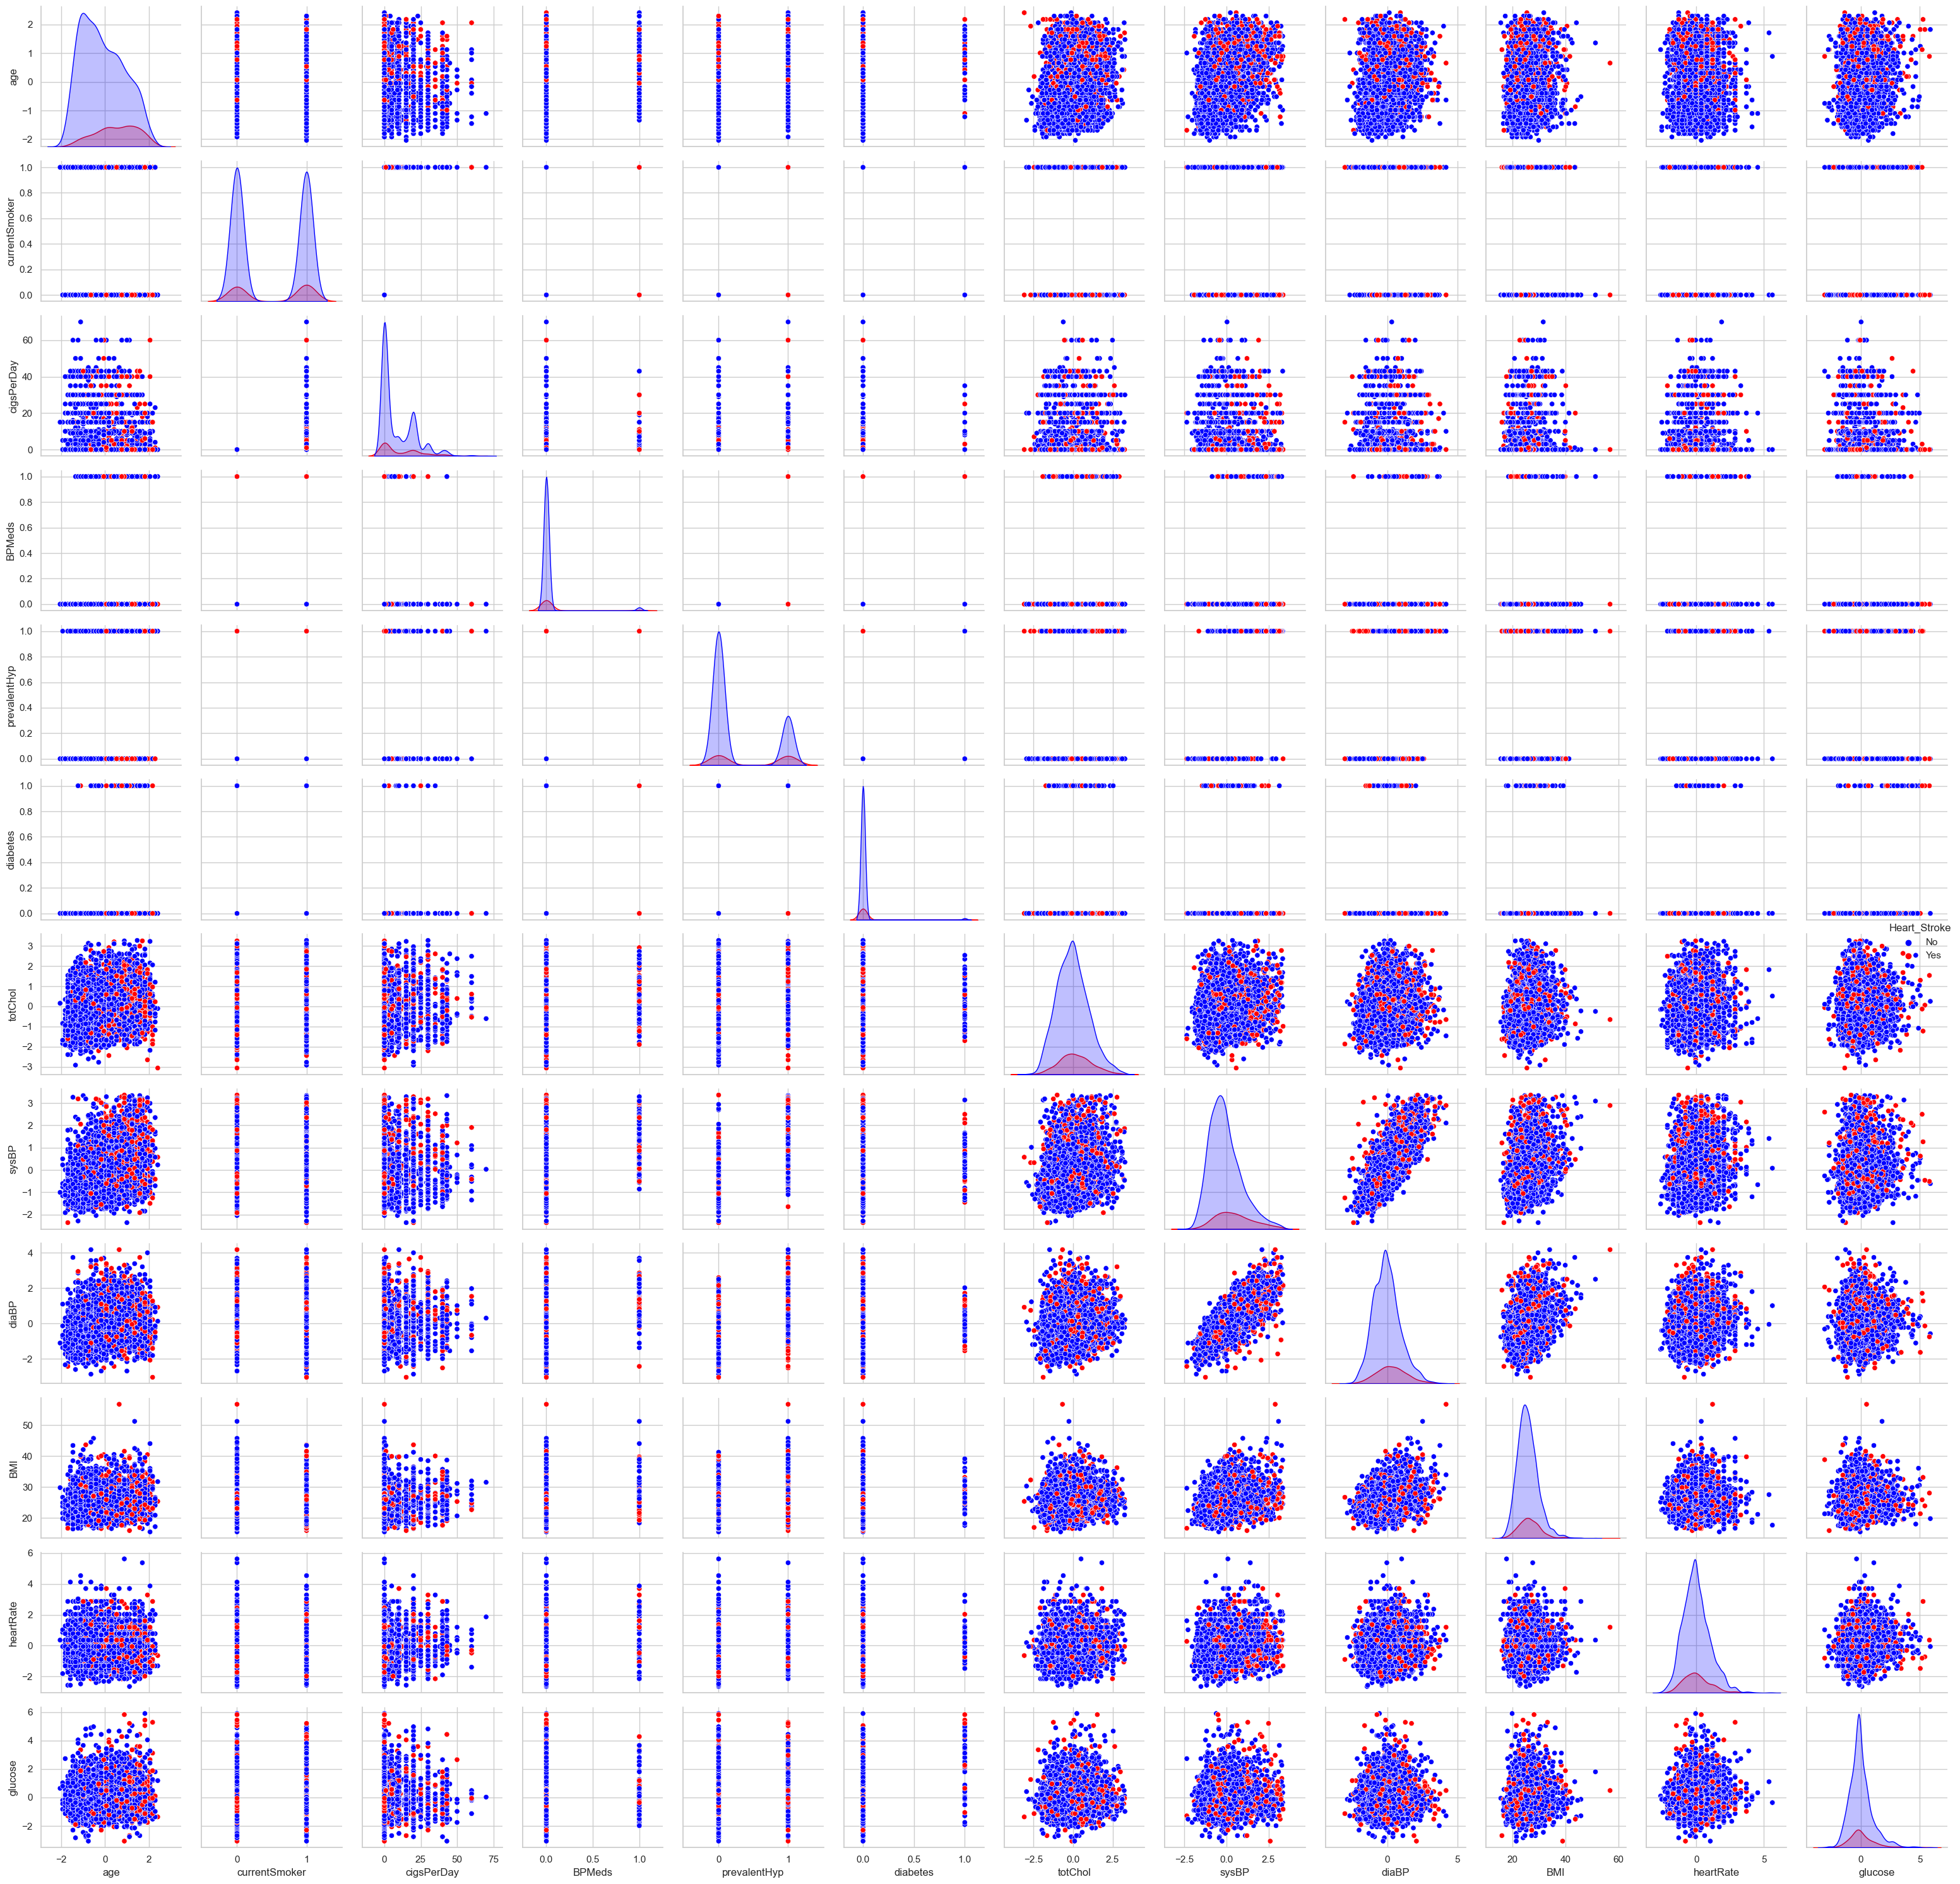

In [26]:
# Assuming df is your DataFrame

# Define a custom color palette
custom_palette = {'No': 'blue', 'Yes': 'red'}  # Change the colors as needed

# Convert the 'Heart_Stroke' column values to title case to match the dictionary
df['Heart_Stroke'] = df['Heart_ stroke'].str.title()

# Create the pairplot with the custom color palette
sns.pairplot(df, hue='Heart_Stroke', diag_kind='kde', palette=custom_palette)

# Show the plot
plt.show()

In [27]:
# Split the data into training and testing sets
X = df.drop(['Heart_ stroke'], axis = 1)
y = df['Heart_ stroke']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Heart_ stroke", axis=1), df["Heart_ stroke"], test_size=0.25, random_state=42)
print("X_train number of rows:", X_train.shape[0])
print("X_test number of rows:", X_test.shape[0])
print("y_train number of rows:", y_train.shape[0])
print("y_test number of rows:", y_test.shape[0])

X_train number of rows: 3098
X_test number of rows: 1033
y_train number of rows: 3098
y_test number of rows: 1033
